
# Name:  Utsav Patidar
# Stock Market Prediction using Numerical and Textual Analysis


### ● Objective: Created a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines <br>
● Stock to analyze and predict - GC=F <br> 
● Downloaded the historical stock prices from finance.yahoo.com <br>
● Downloaded the textual (news) data from https://bit.ly/36fFPI6 <br>  
● Used Python for separate analysis and then combine the findings to create a hybrid model<br> 


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
stock_price = pd.read_csv('GC=F.csv')
stock_headlines = pd.read_csv('C:\Users\Utsav\Downloads\india-news-headlines.csv')
stock_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
1,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
3,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0
4,2000-09-07,274.000000,274.000000,274.000000,274.000000,274.000000,125.0
...,...,...,...,...,...,...,...
5281,2021-05-28,1897.500000,1905.400024,1881.900024,1902.500000,1902.500000,2415.0
5282,2021-06-01,1905.099976,1916.199951,1892.800049,1902.900024,1902.900024,640.0
5283,2021-06-02,1899.199951,1908.800049,1896.000000,1907.500000,1907.500000,1267.0
5284,2021-06-03,1908.800049,1908.800049,1865.000000,1871.199951,1871.199951,1021.0


In [12]:
stock_headlines

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [13]:
print(stock_headlines['publish_date'].dtype)
print(stock_price['Date'].dtype) #needs to be converted to datetime


int64
object


In [14]:
len(stock_price), len(stock_headlines)

(5286, 3424067)

In [15]:
#dropping null and duplicate entries in our data
stock_price.dropna(inplace = True)
stock_price = stock_price.drop_duplicates()
stock_headlines.dropna(inplace = True)
stock_headlines = stock_headlines.drop_duplicates()

In [16]:
len(stock_price), len(stock_headlines)

(5174, 3399876)

# STOCK PRICE

In [17]:
# coverting the datatype of column 'Date' from type object to type 'datetime'
stock_price['Date'] = pd.to_datetime(stock_price['Date']).dt.normalize()

# filtering the important columns
stock_price = stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

#setting column 'Date' as the index column
stock_price.set_index('Date', inplace= True)

# sorting the data according to Date
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

,Close,Open,High,Low,Volume
Date,,,,,
2000-09-01,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-05,275.799988,275.799988,275.799988,275.799988,2.0
2000-09-06,274.200012,274.200012,274.200012,274.200012,0.0
2000-09-07,274.000000,274.000000,274.000000,274.000000,125.0
2000-09-08,273.299988,273.299988,273.299988,273.299988,0.0
...,...,...,...,...,...
2021-05-28,1902.500000,1897.500000,1905.400024,1881.900024,2415.0
2021-06-01,1902.900024,1905.099976,1916.199951,1892.800049,640.0
2021-06-02,1907.500000,1899.199951,1908.800049,1896.000000,1267.0


# STOCK HEADLINES

In [18]:
# coverting the datatype of column 'Date' from type string to type 'datetime'
stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date']).dt.normalize()

# filtering the important columns 
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])

# grouping the news headlines according to Date
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting Date as the index column
stock_headlines.set_index('publish_date', inplace= True)

# sorting the data according to the Date
stock_headlines = stock_headlines.sort_index(ascending=True, axis=0)
stock_headlines

<ipython-input-18-c8e87ea3ffdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
<ipython-input-18-c8e87ea3ffdc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
<ipython-input-18-c8e87ea3ffdc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


In [19]:
from textblob import TextBlob
polarity = []
subjectivity = []
for idx, row in stock_headlines.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [21]:
stock_headlines['polarity'] = polarity
stock_headlines['subjectivity'] = subjectivity
stock_headlines

,headline_text,polarity,subjectivity
publish_date,,,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.148485,0.240909
2001-01-03,"Powerless north India gropes in the dark,Think...",0.108333,0.458333
2001-01-04,The string that pulled Stephen Hawking to Indi...,0.115404,0.512342
2001-01-05,Light combat craft takes India into club class...,0.257045,0.462652
2001-01-06,Light combat craft takes India into club class...,0.219481,0.464935
...,...,...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.044470,0.407395
2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.081137,0.417158
2020-12-29,Man recovers charred remains of 'thief' from h...,0.066816,0.412775


In [22]:
# concatenation of the datasets stock_price and stock_headlines
stock_data = pd.concat([stock_price, stock_headlines], axis=1)
stock_data.dropna(axis=0, inplace=True)

# displaying the combined stock_data
stock_data

,Close,Open,High,Low,Volume,headline_text,polarity,subjectivity
2001-01-02,268.399994,268.399994,268.399994,268.399994,0.0,Status quo will not be disturbed at Ayodhya; s...,0.148485,0.240909
2001-01-03,268.000000,268.000000,268.000000,268.000000,1.0,"Powerless north India gropes in the dark,Think...",0.108333,0.458333
2001-01-04,267.299988,267.299988,267.299988,267.299988,1.0,The string that pulled Stephen Hawking to Indi...,0.115404,0.512342
2001-01-05,268.000000,268.000000,268.000000,268.000000,0.0,Light combat craft takes India into club class...,0.257045,0.462652
2001-01-08,268.000000,268.000000,268.000000,268.000000,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",0.013447,0.316351
...,...,...,...,...,...,...,...,...
2020-12-23,1874.699951,1867.000000,1878.800049,1864.500000,82.0,"Sawmill in Makarpura GIDC gutted; none hurt,Ci...",0.081997,0.392756
2020-12-28,1877.199951,1895.500000,1895.800049,1873.699951,75.0,Horoscope Today; 28 December 2020: Check astro...,0.081137,0.417158
2020-12-29,1879.699951,1881.300049,1881.300049,1879.699951,343.0,Man recovers charred remains of 'thief' from h...,0.066816,0.412775
2020-12-30,1891.000000,1879.900024,1895.800049,1877.300049,444.0,Numerology Readings 30 December 2020: Predicti...,0.058847,0.433598


# Stock Data Analysis

Text(0, 0.5, 'Close Price (INR)')

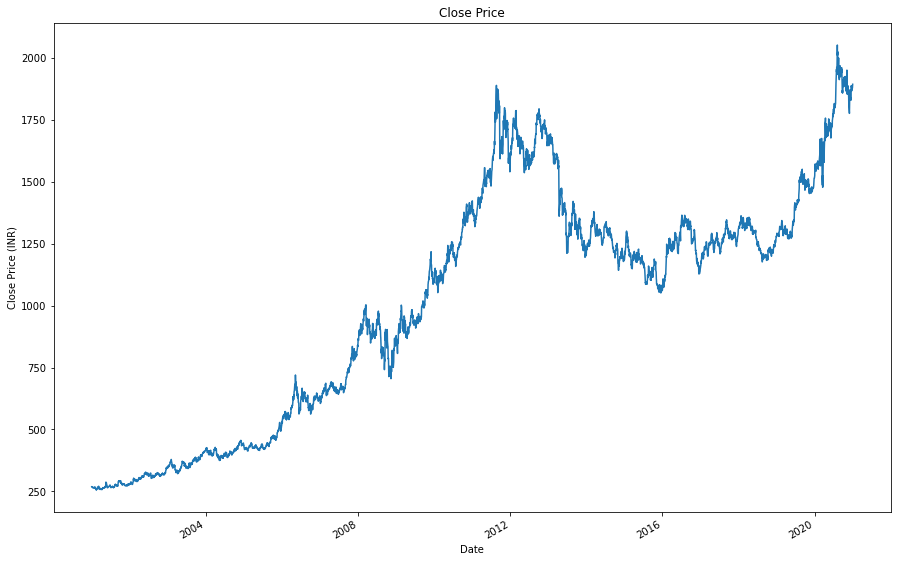

In [23]:
plt.figure(figsize=(15,10))
stock_data['Close'].plot()

plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [24]:
# calculating 7 day rolling mean
stock_data.rolling(7).mean().head(20)

,Close,Open,High,Low,Volume,polarity,subjectivity
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,267.414285,267.414285,267.414285,267.414285,0.285714,0.089065,0.359502
2001-01-23,267.085715,267.085715,267.085715,267.085715,0.285714,0.076533,0.371638
2001-01-24,266.557142,266.557142,266.557142,266.557142,0.142857,0.075342,0.341082
2001-01-25,266.157144,266.157144,266.157144,266.157144,0.000000,0.067394,0.330374


<AxesSubplot:>

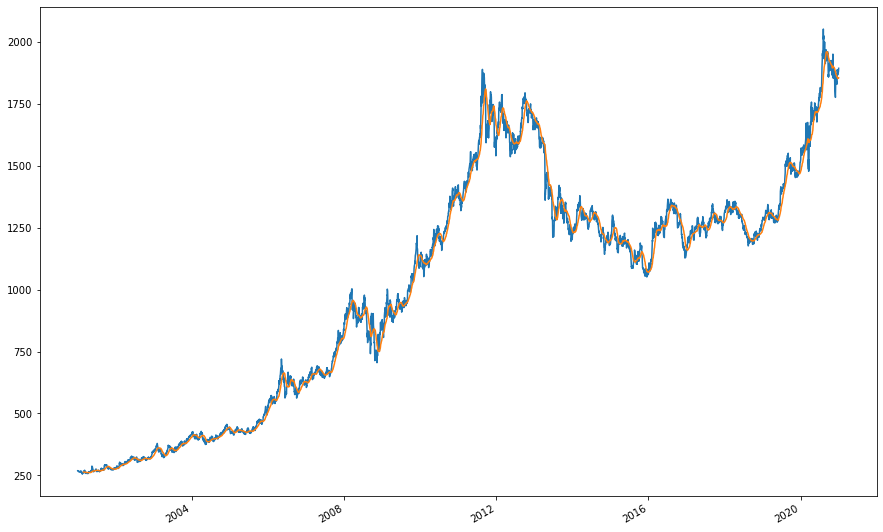

In [25]:
# setting figure size
plt.figure(figsize=(15,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

# Predicting opening price

In [26]:
#predicting opening prices
df= stock_data[['Open', 'High',  'Volume', 'polarity', 'subjectivity']]
y=df['High']
X=df.copy()
X.drop('High',axis=1,inplace=True)

In [27]:
#importing test train split
from sklearn.model_selection import train_test_split

#Train-Test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.15,shuffle=False)
X_test

,Open,Volume,polarity,subjectivity
2018-01-05,1320.300049,1.0,0.063854,0.374854
2018-01-08,1319.900024,41.0,0.087401,0.388622
2018-01-09,1309.599976,16.0,0.067696,0.390484
2018-01-10,1320.300049,70.0,0.052244,0.387770
2018-01-11,1317.099976,9.0,0.046267,0.341841
...,...,...,...,...
2020-12-23,1867.000000,82.0,0.081997,0.392756
2020-12-28,1895.500000,75.0,0.081137,0.417158
2020-12-29,1881.300049,343.0,0.066816,0.412775
2020-12-30,1879.900024,444.0,0.058847,0.433598


In [28]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
LinearRegression_model= LinearRegression()
LinearRegression_model.fit(X_train,y_train)
acc_LinearRegression =LinearRegression_model.score(X_test,y_test)
acc_LinearRegression

0.9983553437652833

In [29]:
#DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model= DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)
acc_DecisionTree =DecisionTree_model.score(X_test,y_test)
acc_DecisionTree

0.988862921714715

In [30]:
#KNN NEIGHBORS
from sklearn import neighbors
knn_model=neighbors.KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train,y_train)
acc_knn =knn_model.score(X_test,y_test)
acc_knn

0.7813515417593735

In [31]:
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error
xgb = XGBRegressor(n_estimators = 20000, n_jobs = -1, learning_rate = 0.15, random_state = 0, max_depth = 8, reg_lambda = 0.5)
xgb.fit(X_train, y_train, early_stopping_rounds = 200, eval_set = [(X_test,y_test)], eval_metric = 'rmse', verbose = True)
cv_pred = xgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, cv_pred)))
print(xgb.score(X_test,y_test))


[0]	validation_0-rmse:1285.13562
[1]	validation_0-rmse:1095.56042
[2]	validation_0-rmse:935.90942
[3]	validation_0-rmse:800.98846
[4]	validation_0-rmse:685.04883
[5]	validation_0-rmse:586.12054
[6]	validation_0-rmse:502.54797
[7]	validation_0-rmse:431.90848
[8]	validation_0-rmse:371.16623
[9]	validation_0-rmse:320.12527
[10]	validation_0-rmse:274.69742
[11]	validation_0-rmse:236.56812
[12]	validation_0-rmse:205.04962
[13]	validation_0-rmse:176.93033
[14]	validation_0-rmse:152.90927
[15]	validation_0-rmse:132.49722
[16]	validation_0-rmse:115.82612
[17]	validation_0-rmse:101.32471
[18]	validation_0-rmse:88.88541
[19]	validation_0-rmse:78.45951
[20]	validation_0-rmse:69.12485
[21]	validation_0-rmse:61.64857
[22]	validation_0-rmse:54.97842
[23]	validation_0-rmse:49.35040
[24]	validation_0-rmse:44.66183
[25]	validation_0-rmse:40.75611
[26]	validation_0-rmse:37.27529
[27]	validation_0-rmse:34.96840
[28]	validation_0-rmse:32.85760
[29]	validation_0-rmse:31.34543
[30]	validation_0-rmse:30.0297

In [32]:
y_predict=LinearRegression_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

k=X_test.shape[1]
n=len(X_test)
RMSE= float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))
MSE= mean_squared_error(y_test,y_predict)
MAE= mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
adj_r2= 1-(1-r2)*(n-1)/(n-k-1)

print("RMSE= ",RMSE)
print("MSE= ",MSE)
print("MAE= ",MAE)
print("R2= ",r2)
print("Adjusted R2= ",adj_r2)

RMSE=  9.799
MSE=  96.02435442846321
MAE=  6.918894974201732
R2=  0.9983553437652833
Adjusted R2=  0.9983464417017666


In [34]:
b=y_test.to_frame()
a = pd.DataFrame(y_predict,columns=["Predicted value"],index=b.index)
result = pd.concat([b, a], axis=1)
result

,High,Predicted value
2018-01-05,1320.300049,1327.595131
2018-01-08,1319.900024,1327.191786
2018-01-09,1311.699951,1316.851549
2018-01-10,1320.699951,1327.627438
2018-01-11,1320.599976,1324.335999
...,...,...
2020-12-23,1878.800049,1877.687178
2020-12-28,1895.800049,1906.406398
2020-12-29,1881.300049,1892.119507
2020-12-30,1895.800049,1890.752355


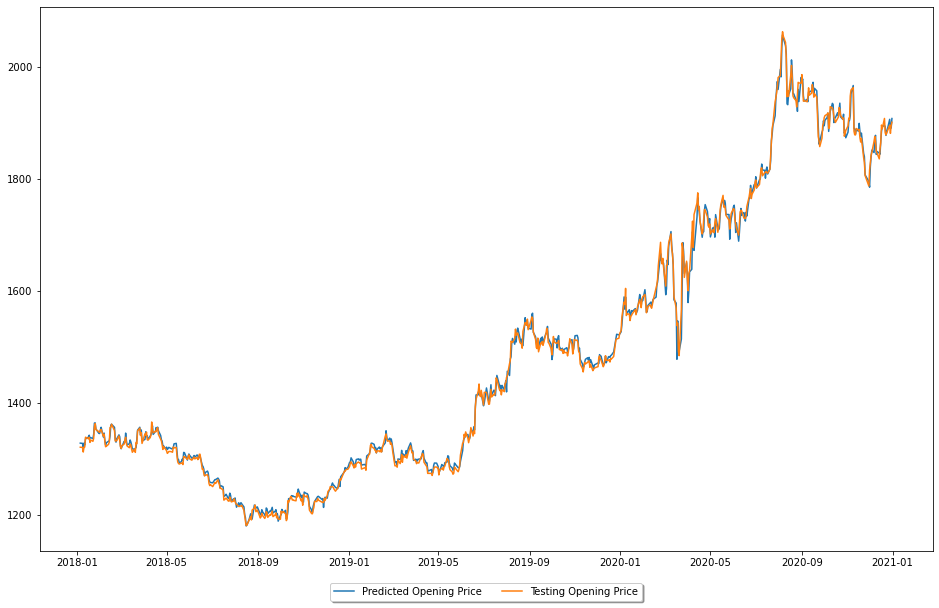

In [36]:
# plotting
plt.figure(figsize=(16,10))
plt.plot(a, label="Predicted Opening Price")
plt.plot(b, label="Testing Opening Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()

# Predicting closing prices


In [37]:
df1= stock_data[['Open', 'Low',  'Volume', 'polarity', 'subjectivity']]
y=df1['Low']
X=df1.copy()
X.drop('Low',axis=1,inplace=True)

In [38]:
#importing test train split
from sklearn.model_selection import train_test_split

#Train-Test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.15,shuffle=False)
y_test

2018-01-05    1320.300049
2018-01-08    1314.599976
2018-01-09    1309.599976
2018-01-10    1315.300049
2018-01-11    1316.300049
                 ...     
2020-12-23    1864.500000
2020-12-28    1873.699951
2020-12-29    1879.699951
2020-12-30    1877.300049
2020-12-31    1892.699951
Name: Low, Length: 744, dtype: float64

In [39]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
LinearRegression_model= LinearRegression()
LinearRegression_model.fit(X_train,y_train)
acc_LinearRegression =LinearRegression_model.score(X_test,y_test)
acc_LinearRegression

0.9975152194359664

In [40]:
#DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model= DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)
acc_DecisionTree =DecisionTree_model.score(X_test,y_test)
acc_DecisionTree

0.9726176938405005

In [41]:
#KNN NEIGHBORS
from sklearn import neighbors
knn_model=neighbors.KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train,y_train)
acc_knn =knn_model.score(X_test,y_test)
acc_knn

0.761858253980733

In [42]:
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error
xgb = XGBRegressor(n_estimators = 20000, n_jobs = -1, learning_rate = 0.15, random_state = 0, max_depth = 8, reg_lambda = 0.5)
xgb.fit(X_train, y_train, early_stopping_rounds = 200, eval_set = [(X_test,y_test)], eval_metric = 'rmse', verbose = True)
cv_pred = xgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, cv_pred)))
print(xgb.score(X_test,y_test))


[0]	validation_0-rmse:1273.52295
[1]	validation_0-rmse:1087.38123
[2]	validation_0-rmse:930.45941
[3]	validation_0-rmse:796.65918
[4]	validation_0-rmse:682.32288
[5]	validation_0-rmse:584.81995
[6]	validation_0-rmse:501.59265
[7]	validation_0-rmse:432.01517
[8]	validation_0-rmse:372.01889
[9]	validation_0-rmse:320.78885
[10]	validation_0-rmse:278.30759
[11]	validation_0-rmse:241.59969
[12]	validation_0-rmse:209.12602
[13]	validation_0-rmse:182.61716
[14]	validation_0-rmse:159.29717
[15]	validation_0-rmse:139.58347
[16]	validation_0-rmse:122.90036
[17]	validation_0-rmse:109.28382
[18]	validation_0-rmse:97.19595
[19]	validation_0-rmse:86.97683
[20]	validation_0-rmse:78.30249
[21]	validation_0-rmse:71.14924
[22]	validation_0-rmse:65.64549
[23]	validation_0-rmse:61.31678
[24]	validation_0-rmse:57.49553
[25]	validation_0-rmse:53.98744
[26]	validation_0-rmse:50.93725
[27]	validation_0-rmse:49.07356
[28]	validation_0-rmse:47.57561
[29]	validation_0-rmse:46.32194
[30]	validation_0-rmse:45.2894

In [43]:
y_predict=LinearRegression_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

k=X_test.shape[1]
n=len(X_test)
RMSE= float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))
MSE= mean_squared_error(y_test,y_predict)
MAE= mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
adj_r2= 1-(1-r2)*(n-1)/(n-k-1)

print("RMSE= ",RMSE)
print("MSE= ",MSE)
print("MAE= ",MAE)
print("R2= ",r2)
print("Adjusted R2= ",adj_r2)

RMSE=  11.694
MSE=  136.73950853908934
MAE=  8.007098606860687
R2=  0.9975152194359664
Adjusted R2=  0.9975017700147809


In [52]:
b=y_test.to_frame()
a = pd.DataFrame(y_predict,columns=["Predicted value"],index=b.index)
result = pd.concat([b, a], axis=1)
result

,Low,Predicted value
2018-01-05,1320.300049,1311.934049
2018-01-08,1314.599976,1311.523589
2018-01-09,1309.599976,1301.338916
2018-01-10,1315.300049,1311.979164
2018-01-11,1316.300049,1308.726077
...,...,...
2020-12-23,1864.500000,1854.461881
2020-12-28,1873.699951,1882.791643
2020-12-29,1879.699951,1868.719973
2020-12-30,1877.300049,1867.384948


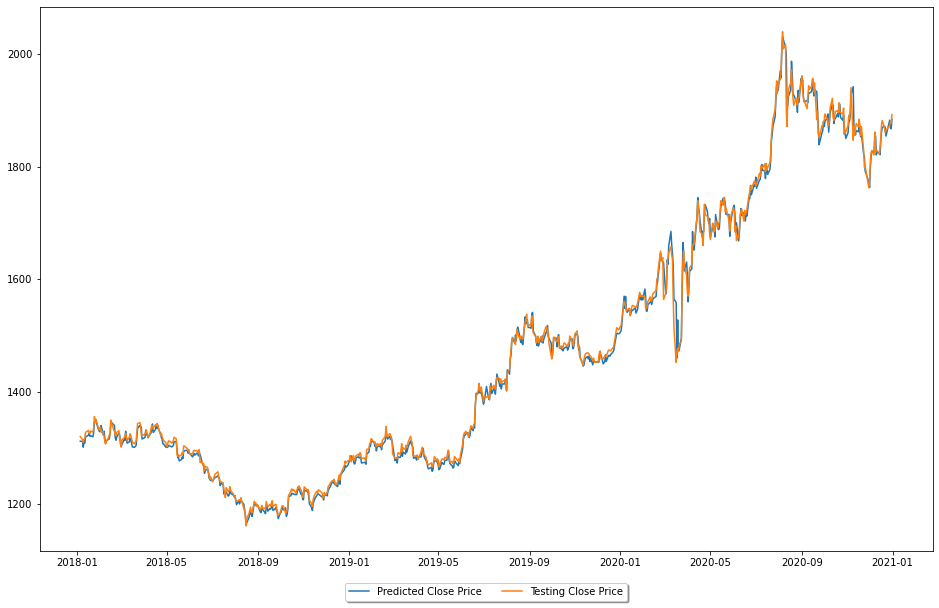

In [51]:
# plotting
plt.figure(figsize=(16,10))
plt.plot(a, label="Predicted Close Price")
plt.plot(b, label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()